<a href="https://colab.research.google.com/github/google/applied-machine-learning-intensive/blob/master/content/02_data/02_intermediate_pandas/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Copyright 2020 Google LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Intermediate Pandas

[Pandas](https://pandas.pydata.org/) is a powerful Python library for working with data. For this lab, you should already know what a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) and [Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html) are and how to do some simple analysis of the data contained in those structures.

In this lab we'll look at some more advanced capabilities of Pandas, such as filtering, grouping, merging, and sorting.

## DataFrame Information

`DataFrame` objects are rich containers that allow us to explore and modify data. In this lab we will learn powerful techniques for working with the data contained in `DataFrame` objects.

To begin, let's create a `DataFrame` containing information about populations and airports in a few select cities.

In [1]:
import pandas as pd

airport_df = pd.DataFrame.from_records((
  ('Atlanta', 498044, 2),
  ('Austin', 964254, 2),
  ('Kansas City',  491918, 8),
  ('New York City', 8398748, 3),
  ('Portland', 653115, 1),
  ('San Francisco', 883305, 3),
  ('Seattle', 744955, 2),
), columns=("City Name", "Population", "Airports"))

airport_df

,City Name,Population,Airports
0,Atlanta,498044,2
1,Austin,964254,2
2,Kansas City,491918,8
3,New York City,8398748,3
4,Portland,653115,1
5,San Francisco,883305,3
6,Seattle,744955,2


If you aren't familiar with the `from_records()` method, it is a way to create a `DataFrame` from data formatted in a tabular manner. In this case we have a tuple-of-tuples where each inner-tuple is a row of data for a city.

### Shape

One interesting fact about a `DataFrame` is its shape. What is shape?

Shape is the number of rows and columns contained in the dataframe.

Let's find the shape of the `airport_df`:

In [2]:
airport_df.shape

(7, 3)

The `DataFrame` has a shape of `(7, 3)`.

This means that the `DataFrame` has seven rows and three columns.

If you are familiar with [NumPy](http://numpy.org), you probably are also familiar with `shape`. `NumPy` arrays can have n-dimensional shapes while `DataFrame` objects tend to stick to two dimensions: rows and columns.

#### Exercise 1: Finding Shape

Download the California housing data referenced below into a `DataFrame`, and print out the shape of the data.

**Student Solution**

In [2]:
url = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"

# Download the housing data
df = pd.read_csv(url)

# Print the shape of the data
df.shape

(17000, 9)

---

### Columns

Speaking of columns, it's possible to ask a `DataFrame` what columns it contains using the `columns` attribute:

In [3]:
airport_df.columns

Index(['City Name', 'Population', 'Airports'], dtype='object')

Notice that the columns are contained in an `Index` object. An `Index` wraps the list of columns. For basic usage, like loops, you can just use the `Index` directly:

In [4]:
for c in airport_df.columns:
  print(c)

City Name
Population
Airports


In [8]:
for c in airport_df.columns:
    print(airport_df[c].values.tolist())

['Atlanta', 'Austin', 'Kansas City', 'New York City', 'Portland', 'San Francisco', 'Seattle']
[498044, 964254, 491918, 8398748, 653115, 883305, 744955]
[2, 2, 8, 3, 1, 3, 2]


If you do need the columns in a lower level format, you can use `.values` to get a `NumPy` array:

In [9]:
type(airport_df.columns.values)

numpy.ndarray

If you need a basic Python list, you can then call `.tolist()` to get the core Python list of column names:

In [10]:
type(airport_df.columns.values.tolist())

list

#### Exercise 2: Pretty Print Columns

The columns in the California housing dataset are not necessarily easy on the eyes. Columns like `housing_median_age` would be easier to read if they were presented as `Housing Median Age`.

In the code block below, download the California housing dataset. Then find the names of the columns in the dataset and convert them from "snake case" to regular English.  For instance `housing_median_age` becomes `Housing Median Age` and `total_rooms` becomes `Total Rooms`. Print the human-readable names one per line. You can find Python string methods that might be helpful [here](https://docs.python.org/3/library/stdtypes.html#text-sequence-type-str).

Write your code in a manner that it could handle any column name in "snake case": Underscores should be replaced by spaces. The first letter of each word should be capitalized.

Be sure to get the column names from the `DataFrame`.

**Student Solution**

In [18]:
import pandas as pd

url = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"

df = pd.read_csv(url)

# 1
# old_columns = df.columns
# new_columns = []

# for column in old_columns:
#     new_columns.append(column.title().replace('_', ' '))

# # print(old_columns)
# # print('------------')
# # print(new_columns)

# df.columns = new_columns

# df

# 2 [1 line]
df.columns = [column.title().replace('_', ' ') for column in df.columns]
df


,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Median Income,Median House Value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


---

### Missing Values

It is common to find datasets with missing data. When this happens it's good to know that the data is missing so you can determine how to handle the situation.

Let's recreate our city data but set some values to `None`:

In [ ]:
# NaN = not number
# None = string
# Nat = date

In [19]:
import pandas as pd

airport_df = pd.DataFrame.from_records((
  ('Atlanta', 498044, 2),
  (None, 964254, 2),
  ('Kansas City',  491918, 8), 
  ('New York City', None, 3),
  ('Portland', 653115, 1),
  ('San Francisco', 883305, None),
  ('Seattle', 744955, 2),
), columns=("City Name", "Population", "Airports"))

airport_df

,City Name,Population,Airports
0,Atlanta,498044.0,2.0
1,None,964254.0,2.0
2,Kansas City,491918.0,8.0
3,New York City,NaN,3.0
4,Portland,653115.0,1.0
5,San Francisco,883305.0,NaN
6,Seattle,744955.0,2.0


You can see that the population of New York and the number of airports in San Francisco are now represented by `NaN` values. This stands for 'Not a Number', which means that the value is an unknown numeric value. You'll also see that where 'Austin' once was, we now have a `None` value. This means that we are missing a non-numeric value.

If we want to ask the `DataFrame` what values are present or missing, we can use the `isna()` method:

In [20]:
airport_df.isna()

,City Name,Population,Airports
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False
5,False,False,True
6,False,False,False


In [21]:
airport_df.isna().sum()

City Name     1
Population    1
Airports      1
dtype: int64

Here we get `True` values where a data point is missing and `False` values where we have data.

Using this, we can do powerful things like select all columns with populations or airports that have missing data:

In [25]:
airport_df['Population'].isna()

0    False
1    False
2    False
3     True
4    False
5    False
6    False
Name: Population, dtype: bool

In [26]:
airport_df[airport_df['Population'].isna()]

,City Name,Population,Airports
3,New York City,NaN,3.0


In [23]:
airport_df

,City Name,Population,Airports
0,Atlanta,498044.0,2.0
1,None,964254.0,2.0
2,Kansas City,491918.0,8.0
3,New York City,NaN,3.0
4,Portland,653115.0,1.0
5,San Francisco,883305.0,NaN
6,Seattle,744955.0,2.0


In [27]:
airport_df[(airport_df['Population'].isna()) | (airport_df['Airports'].isna())]

,City Name,Population,Airports
3,New York City,NaN,3.0
5,San Francisco,883305.0,NaN


In [41]:
airport_df[~(airport_df['Population'].isna())]

,City Name,Population,Airports
0,Atlanta,498044.0,2.0
1,None,964254.0,2.0
2,Kansas City,491918.0,8.0
4,Portland,653115.0,1.0
5,San Francisco,883305.0,NaN
6,Seattle,744955.0,2.0


Now that we know that we are missing the population of New York and the number of airports in San Francisco, we can look up that data and manually fix it.

Sometimes the fixes aren't so easy. The data might be impossible to find, or there might be so many missing values that you can't individually fix them all.

In these cases you have two options: completely remove the offending rows or columns or patch the data in some way. Throughout this course we will work with many datasets that have missing or obviously invalid values, and we will discuss mitigation strategies.

## Filtering


Filtering is an important concept in data analysis and processing. When you think of filtering in the real world, you likely think of an object that blocks undesired things while allowing desired things to pass through.

Imagine a coffee filter. It stops the coffee grounds from getting into the coffee pot, but it allows the water bound to coffee's chemical compounds to pass through into your perfect brew.

Filtering a `DataFrame` is similar. A `DataFrame` contains rows of data. Some of these rows might be important to you, and some you might want to discard. Filtering allows you select only the data that you care about and put that data in a new `DataFrame`.

In the example below, we filter our `airport_df` to select only cities that have more than two airports. In return we get a `DataFrame` that contains only information about cities that have more than two airports.

In [29]:
airport_df['Airports'] > 2

0    False
1    False
2     True
3     True
4    False
5    False
6    False
Name: Airports, dtype: bool

In [24]:
airport_df[airport_df['Airports'] > 2]

,City Name,Population,Airports
2,Kansas City,491918.0,8.0
3,New York City,NaN,3.0


Let's deconstruct this statement. At its core we have:

```python
airport_df['Airports'] > 2
```

This expression compares every 'Airports' value in the `airport_df` `DataFrame` and returns `True` if there are more than two airports, `False` otherwise.

In [28]:
airport_df['Airports'] > 2

0    False
1    False
2     True
3     True
4    False
5    False
6    False
Name: Airports, dtype: bool

This data is returned as a Pandas `Series`. The series is then used as a boolean index for the `airport_df` the `DataFrame`.

**Boolean index** is just a term used to refer to a `Series` (or other list-like structure) of boolean values used in the index operator, `[]`, for the `DataFrame`. Ideally the boolean index length should be equal to the number of rows in the `DataFrame` being indexed. `DataFrame` rows that map to `True` values in the index are retained, while rows that map to `False` values are filtered out.

In [32]:
has_many_airports = airport_df['Airports'] > 2
print(has_many_airports)

0    False
1    False
2     True
3     True
4    False
5    False
6    False
Name: Airports, dtype: bool


In [33]:
airport_df[has_many_airports]

,City Name,Population,Airports
2,Kansas City,491918.0,8.0
3,New York City,NaN,3.0


If you are familiar with Boolean logic and Python, you probably know that you can create compound expressions using the `or` and `and` keywords. You can also use the keyword `not` to reverse an expression.

In [42]:
print(True and False)
print(True or False)
print(not True)

False
True
False


You can do similar things in Pandas with boolean indices. However, `and`, `or`, and `not` don't work as expected. Instead you need to use the `&`, `|`, and `!` operators.

- `and` changes to `&`
- `or` changes to `|`
- `not` changes to `!`

For normal numbers in Python, these are actually the 'bitwise logical operators'. When working on Pandas objects, these operators don't perform bitwise calculations but instead perform Boolean logic.

Let's see this in action with an example. Imagine we want to find all cities with more than two airports and less than a million inhabitants. First, let's find the rows with more than two airports:

In [35]:
has_many_airports = airport_df['Airports'] > 2
has_many_airports

0    False
1    False
2     True
3     True
4    False
5    False
6    False
Name: Airports, dtype: bool

Now we can find the rows that represent a city with less than a million residents:

In [43]:
small_cities = airport_df['Population'] < 1000000
small_cities

0     True
1     True
2     True
3    False
4     True
5     True
6     True
Name: Population, dtype: bool

We can then combine `has_many_airports` with `small_cities` to find small cities with a large number of airports.

To do this we first need to use the `&` operator to combine the two Boolean tables:

In [44]:
small_but_flighty = has_many_airports & small_cities
small_but_flighty

0    False
1    False
2     True
3    False
4    False
5    False
6    False
dtype: bool

We can use this boolean index to select the rows from the original `DataFrame` that contain data about cities with fewer than one million residents and more than two airports.

In [45]:
airport_df[small_but_flighty]

,City Name,Population,Airports
2,Kansas City,491918.0,8.0


In this example we broke the filter down into many steps. It could actually be performed in one expression as shown below.

In [46]:
airport_df[(airport_df['Airports'] > 2) & (airport_df['Population'] < 1000000)]

,City Name,Population,Airports
2,Kansas City,491918.0,8.0


Notice the need for parenthesis around each Boolean expression. This is because `&` has a higher precedence than `>` and `<`.

The term 'filtering' is typically used when talking about rows of data. However, it is possible to filter out columns of a dataset. To filter columns simply list the columns that you do want to keep in a `list` and pass it to the `DataFrame` selector:

In [48]:
population_df = airport_df[['City Name', 'Population']]

population_df

,City Name,Population
0,Atlanta,498044.0
1,None,964254.0
2,Kansas City,491918.0
3,New York City,NaN
4,Portland,653115.0
5,San Francisco,883305.0
6,Seattle,744955.0


If a dataset has many columns, it might be easier to exclude a column using a list expansion instead of explicitly listing many columns:

In [52]:
# new_columns = pd.DataFrame(airport_df.columns, columns=['Column Name'])
# new_columns = new_columns[new_columns['Column Name'] != 'Airprots'].values[0]
# new_columns

array(['City Name'], dtype=object)

In [59]:
population_df = airport_df[
  [col for col in airport_df.columns if col != 'Airports']]

population_df

,City Name,Population
0,Atlanta,498044.0
1,None,964254.0
2,Kansas City,491918.0
3,New York City,NaN
4,Portland,653115.0
5,San Francisco,883305.0
6,Seattle,744955.0


This works for multiple columns also:

In [57]:
population_df = airport_df[
  [col for col in airport_df.columns if col not in {'Airports', 'Population'}]]

population_df

,City Name
0,Atlanta
1,None
2,Kansas City
3,New York City
4,Portland
5,San Francisco
6,Seattle


### Exercise 3: SoCal

Using the California housing `DataFrame` from the previous unit, make a new `DataFrame` that only contains data from the southern part of California. What is 'southern'? For the purpose of this exercise, let's say that southern California includes everything below 36 degrees latitude. 

Create a new `DataFrame` called `socal_df` containing only data points below the 36 latitude. Then print out the shape of that `DataFrame`.

**Student Solution**

In [58]:
url = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"
cali_df = pd.read_csv(url)

# Your Code Goes here
cali_df = cali_df[cali_df['latitude'] < 36]
cali_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
11262,-121.10,35.60,20.0,3389.0,704.0,1309.0,520.0,3.2112,204500.0
11271,-121.11,35.52,9.0,6044.0,1222.0,2239.0,972.0,3.2400,264600.0
11278,-121.12,35.58,16.0,4109.0,798.0,1298.0,626.0,3.4799,320800.0
11299,-121.14,35.55,13.0,5383.0,1070.0,1880.0,796.0,3.8019,271200.0


---

## Grouping Data

We can also aggregate `DataFrame` objects by grouping rows of data together.

For our examples we will create a `DataFrame` containing the ages, heights, and weights of a sample of children:

In [60]:
import pandas as pd

body_measurement_df = pd.DataFrame.from_records((
  (2, 83.82, 8.4),
  (4, 99.31, 16.97),
  (3, 96.52, 14.41),
  (6, 114.3, 20.14),
  (4, 101.6, 16.91),
  (2, 86.36, 12.64),
  (3, 92.71, 14.23),
  (2, 85.09, 11.11),
  (2, 85.85, 14.18),
  (5, 106.68, 20.01),
  (4, 99.06, 13.17),
  (5, 109.22, 15.36),
  (4, 100.84, 14.78),
  (6, 115.06, 20.06),
  (2, 84.07, 10.02),
  (7, 121.67, 28.4),
  (3, 94.49, 14.05),
  (6, 116.59, 17.55),
  (7, 121.92, 22.96),
), columns=("Age (yrs)", "Height (cm)", "Weight (kg)"))

body_measurement_df

,Age (yrs),Height (cm),Weight (kg)
0,2,83.82,8.40
1,4,99.31,16.97
2,3,96.52,14.41
3,6,114.30,20.14
4,4,101.60,16.91
5,2,86.36,12.64
6,3,92.71,14.23
7,2,85.09,11.11
8,2,85.85,14.18
9,5,106.68,20.01


As you can see, we have a fairly low-level dump of data. It is unsorted and is generally difficult to gain any insight from. We could group the data by age and find metrics such as the count, max, min, mean, median, and more. This information might be more easy to analyze.

In order to do this grouping, we use the `groupby` method on the `DataFrame`.

For instance, if we wanted to know the mean values for the columns for each year of age, we could run the following code:

In [67]:
body_measurement_df.groupby('Age (yrs)').mean()
# body_measurement_df.groupby('Age (yrs)').median()
# body_measurement_df.groupby('Age (yrs)').quantile(0.75)
# body_measurement_df.groupby('Age (yrs)').max()
# body_measurement_df.groupby('Age (yrs)').min()
# body_measurement_df.groupby('Age (yrs)').describe()

,Height (cm),Weight (kg)
Age (yrs),,
2,85.038000,11.2700
3,94.573333,14.2300
4,100.202500,15.4575
5,107.950000,17.6850
6,115.316667,19.2500
7,121.795000,25.6800


We get a `DataFrame` sorted by the column that we chose to group by. The 'Height (cm)' and 'Weight (kg)' columns now represent the mean height and weight for each age represented in our dataset.

Looking at this data, you can now see a steady increase in height and weight as age increases, which is what you are likely to expect.

You might notice here that the 'Age (yrs)' column looks a little different. It is now not a regular column, but is instead an index column.

Let's see what this means by saving the grouped data into a new `DataFrame`:

In [69]:
mean_body_measurement_df = body_measurement_df.groupby('Age (yrs)').mean()

mean_body_measurement_df.columns

Index(['Height (cm)', 'Weight (kg)'], dtype='object')

You'll notice that 'Age (yrs)' is no longer listed as a column. In order to access the age you instead have to use the `.index` property of the `DataFrame`.

Note that we get an `Int64Index` object back and not a `Series` as we would if we referenced a single column.

In [72]:
mean_body_measurement_df.index

Int64Index([2, 3, 4, 5, 6, 7], dtype='int64', name='Age (yrs)')

In [71]:
mean_body_measurement_df.reset_index()

,Age (yrs),Height (cm),Weight (kg)
0,2,85.038000,11.2700
1,3,94.573333,14.2300
2,4,100.202500,15.4575
3,5,107.950000,17.6850
4,6,115.316667,19.2500
5,7,121.795000,25.6800



We aren't restricted to just using `mean()`. There are many other aggregate functions that we could use, including `max()`, which gives us the largest sample in each grouping:

In [73]:
body_measurement_df.groupby('Age (yrs)').max()

,Height (cm),Weight (kg)
Age (yrs),,
2,86.36,14.18
3,96.52,14.41
4,101.60,16.97
5,109.22,20.01
6,116.59,20.14
7,121.92,28.40


And `min()` which gives the smallest value in each grouping:

In [74]:
body_measurement_df.groupby('Age (yrs)').min()

,Height (cm),Weight (kg)
Age (yrs),,
2,83.82,8.40
3,92.71,14.05
4,99.06,13.17
5,106.68,15.36
6,114.30,17.55
7,121.67,22.96


There are many other aggregate functions. You can see the entire list in the [`GroupBy` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html).

Sometimes performing a single aggregation across all columns is limiting. What if you want the mean of one column and the max of another? What if you want to perform multiple aggregations on one column?

You can perform different and multiple aggregations using the `agg()` function:

In [76]:
body_measurement_df.groupby('Age (yrs)').agg({
    'Height (cm)': 'mean',
    'Weight (kg)': ['max', 'min'],
})

Height (cm) Weight (kg)       
                 mean         max    min
Age (yrs)                               
2           85.038000       14.18   8.40
3           94.573333       14.41  14.05
4          100.202500       16.97  13.17
5          107.950000       20.01  15.36
6          115.316667       20.14  17.55
7          121.795000       28.40  22.96

As you can see, `agg()` accepts a dictionary. The keys are the columns that you want to aggregate. The values are either a single aggregation function name or lists of aggregation function names.

### Exercise 4: Grouping

Given the body measurement dataset in a `DataFrame`, group the data by 'Age (yrs)' and find the following aggregations using the `agg()` function:

* 'Age (yrs)' count
* 'Height (cm)' min
* 'Height (cm)' max
* 'Height (cm)' mean
* 'Height (cm)' standard deviation
* 'Weight (kg)' min
* 'Weight (kg)' max
* 'Weight (kg)' mean
* 'Weight (kg)' standard deviation


**Student Solution**

In [81]:
body_measurement_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age (yrs),19.0,4.052632,1.747178,2.00,2.500,4.00,5.50,7.00
Height (cm),19.0,100.797895,12.906736,83.82,89.535,99.31,111.76,121.92
Weight (kg),19.0,16.071053,4.757365,8.40,13.610,14.78,18.78,28.40


In [77]:
import pandas as pd

body_measurement_df = pd.DataFrame.from_records((
  (2, 83.82, 8.4),
  (4, 99.31, 16.97),
  (3, 96.52, 14.41),
  (6, 114.3, 20.14),
  (4, 101.6, 16.91),
  (2, 86.36, 12.64),
  (3, 92.71, 14.23),
  (2, 85.09, 11.11),
  (2, 85.85, 14.18),
  (5, 106.68, 20.01),
  (4, 99.06, 13.17),
  (5, 109.22, 15.36),
  (4, 100.84, 14.78),
  (6, 115.06, 20.06),
  (2, 84.07, 10.02),
  (7, 121.67, 28.4),
  (3, 94.49, 14.05),
  (6, 116.59, 17.55),
  (7, 121.92, 22.96),
), columns=("Age (yrs)", "Height (cm)", "Weight (kg)"))

# body_measurement_df

# Your Solution Goes Here
agg_funcs = ['min', 'max', 'mean', 'std']
body_measurement_df.groupby('Age (yrs)').agg({
  'Age (yrs)': ['count'],
  'Height (cm)': agg_funcs,
  'Weight (kg)': agg_funcs
})

Age (yrs) Height (cm)                               Weight (kg)  \
              count         min     max        mean       std         min   
Age (yrs)                                                                   
2                 5       83.82   86.36   85.038000  1.098895        8.40   
3                 3       92.71   96.52   94.573333  1.906367       14.05   
4                 4       99.06  101.60  100.202500  1.219464       13.17   
5                 2      106.68  109.22  107.950000  1.796051       15.36   
6                 3      114.30  116.59  115.316667  1.166376       17.55   
7                 2      121.67  121.92  121.795000  0.176777       22.96   

                                     
             max     mean       std  
Age (yrs)                            
2          14.18  11.2700  2.245551  
3          14.41  14.2300  0.180000  
4          16.97  15.4575  1.833855  
5          20.01  17.6850  3.288047  
6          20.14  19.2500  1.472786  
7          28.40  25.6800  3.846661

---

## Merging Data

It is common for related data to be stored in different locations. When this happens you sometimes need to merge the data into a single `DataFrame` in order to work with all of the data in an easy manner.

Let's take a look at some data about popular desserts. First, we have nutritional information:

In [82]:
import pandas as pd

nutrition_information_df = pd.DataFrame.from_records((
  ('Cupcake', 178, 5.26, 32.54, 1.37),
  ('Donut', 190, 10.51, 21.62, 2.62),
  ('Eclair', 267, 16.01, 24.68, 6.53),
  ('Froyo', 214, 2.94, 39.24, 9.4),
  ('Gingerbread', 130, 5, 19, 2),
  ('Honeycomb', 190, 13, 23, 2),
  ('Ice Cream Sandwich', 143, 5.6, 21.75, 2.61),
  ('Jelly Bean', 100, 0, 25, 0),
  ('KitKat', 210, 11, 27, 3),
  ('Lollipop', 110, 0, 28, 0),
  ('Marshmallow', 100, 0, 24, 1),
  ('Nougat', 56, 0.23, 12.93, 0.47),
  ('Oreo', 160, 7, 25, 1),
  ('Pie', 356, 16.5, 51, 2.85),
), columns=('Name', 'Calories', 'Fat (g)', 'Carbs (g)', 'Protein (g)'))

nutrition_information_df

,Name,Calories,Fat (g),Carbs (g),Protein (g)
0,Cupcake,178,5.26,32.54,1.37
1,Donut,190,10.51,21.62,2.62
2,Eclair,267,16.01,24.68,6.53
3,Froyo,214,2.94,39.24,9.40
4,Gingerbread,130,5.00,19.00,2.00
5,Honeycomb,190,13.00,23.00,2.00
6,Ice Cream Sandwich,143,5.60,21.75,2.61
7,Jelly Bean,100,0.00,25.00,0.00
8,KitKat,210,11.00,27.00,3.00
9,Lollipop,110,0.00,28.00,0.00


We also have data about the manufacturing costs and the retail price of each of the desserts:

In [83]:
import pandas as pd

costs_df = pd.DataFrame.from_records((
  ('Cupcake', 1.24, 4.50),
  ('Donut', 0.17, 0.99),
  ('Eclair', 0.54, 2.50),
  ('Froyo', 0.78, 3.50),
  ('Gingerbread', 0.45, 0.99),
  ('Honeycomb', 1.25, 3.00),
  ('Ice Cream Sandwich', 1.21, 2.99),
  ('Jelly Bean', 0.04, 0.99),
  ('KitKat', 0.33, 1.50),
  ('Lollipop', 0.11, 1.10),
  ('Marshmallow', 0.03, 0.50),
  ('Nougat', 0.75, 1.50),
  ('Oreo', 0.78, 2.00),
  ('Pie', 0.66, 2.25),
), columns=('Name', 'Manufacturing (USD)', 'Retail (USD)'))

costs_df

,Name,Manufacturing (USD),Retail (USD)
0,Cupcake,1.24,4.50
1,Donut,0.17,0.99
2,Eclair,0.54,2.50
3,Froyo,0.78,3.50
4,Gingerbread,0.45,0.99
5,Honeycomb,1.25,3.00
6,Ice Cream Sandwich,1.21,2.99
7,Jelly Bean,0.04,0.99
8,KitKat,0.33,1.50
9,Lollipop,0.11,1.10


If we want to combine the data into a single `DataFrame`, we can merge the data:

In [84]:
pd.merge(nutrition_information_df, costs_df)

,Name,Calories,Fat (g),Carbs (g),Protein (g),Manufacturing (USD),Retail (USD)
0,Cupcake,178,5.26,32.54,1.37,1.24,4.50
1,Donut,190,10.51,21.62,2.62,0.17,0.99
2,Eclair,267,16.01,24.68,6.53,0.54,2.50
3,Froyo,214,2.94,39.24,9.40,0.78,3.50
4,Gingerbread,130,5.00,19.00,2.00,0.45,0.99
5,Honeycomb,190,13.00,23.00,2.00,1.25,3.00
6,Ice Cream Sandwich,143,5.60,21.75,2.61,1.21,2.99
7,Jelly Bean,100,0.00,25.00,0.00,0.04,0.99
8,KitKat,210,11.00,27.00,3.00,0.33,1.50
9,Lollipop,110,0.00,28.00,0.00,0.11,1.10


[Pandas](https://pandas.pydata.org) searches for columns with the same name and uses those columns to match rows of data. The result is a single `DataFrame` with columns from the merged `DataFrame` objects.

What if we have yet another `DataFrame` that contains the inventory of desserts that we have in stock:

In [85]:
import pandas as pd

inventory_df = pd.DataFrame.from_records((
  ('Marshmallow', 1004),
  ('Nougat', 563),
  ('Oreo', 789),
  ('Pie', 33),
), columns=('Name', '# In Stock'))

inventory_df

,Name,# In Stock
0,Marshmallow,1004
1,Nougat,563
2,Oreo,789
3,Pie,33


If we want to join our inventory with our cost data to see how much earning potential we have in stock, we can join the `costs_df` with the `inventory_df`:

In [86]:
pd.merge(costs_df, inventory_df) 
# default inner join

,Name,Manufacturing (USD),Retail (USD),# In Stock
0,Marshmallow,0.03,0.50,1004
1,Nougat,0.75,1.50,563
2,Oreo,0.78,2.00,789
3,Pie,0.66,2.25,33


If we wanted we could then sum up our retail prices multiplied by inventory to see how much gross revenue potential we currently have.

Notice that we only have four desserts. What happened?

By default when merging `DataFrame` objects only rows that match across `DataFrame` objects are returned. Non-matching rows are filtered out.

We can change this by telling `merge` to do an *outer* join. This will keep all of the data in the first `DataFrame` passed to `merge()` and fill in any missing data with null values.

In [87]:
pd.merge(costs_df, inventory_df, how='outer')

,Name,Manufacturing (USD),Retail (USD),# In Stock
0,Cupcake,1.24,4.50,NaN
1,Donut,0.17,0.99,NaN
2,Eclair,0.54,2.50,NaN
3,Froyo,0.78,3.50,NaN
4,Gingerbread,0.45,0.99,NaN
5,Honeycomb,1.25,3.00,NaN
6,Ice Cream Sandwich,1.21,2.99,NaN
7,Jelly Bean,0.04,0.99,NaN
8,KitKat,0.33,1.50,NaN
9,Lollipop,0.11,1.10,NaN


There are many options for merging data. You have options available to keep rows in specific `DataFrames`, to use different columns to join on, and much more. Check out the [`merge` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) to learn more.

### Exercise 5: Merging `DataFrame` Objects

In this exercise we will answer a few questions about our dessert-making operation. In order to answer these questions, you are provided with the `costs_df` `DataFrame`, which contains names of treats and costs related to them.

The columns are:
  * **Name**: The name of the treat.
  * **Manufacturing (USD)**: The cost in United States dollars to create one saleable unit of the treat.
  * **Retail (USD)**: The price that one serving of the treat is sold for. 

In [88]:
import pandas as pd

costs_df = pd.DataFrame.from_records((
  ('Cupcake', 1.24, 4.50),
  ('Donut', 0.17, 0.99),
  ('Eclair', 0.54, 2.50),
  ('Froyo', 0.78, 3.50),
  ('Gingerbread', 0.45, 0.99),
  ('Honeycomb', 1.25, 3.00),
  ('Ice Cream Sandwich', 1.21, 2.99),
  ('Jelly Bean', 0.04, 0.99),
  ('KitKat', 0.33, 1.50),
  ('Lollipop', 0.11, 1.10),
  ('Marshmallow', 0.03, 0.50),
  ('Nougat', 0.75, 1.50),
  ('Oreo', 0.78, 2.00),
  ('Pie', 0.66, 2.25),
), columns=('Name', 'Manufacturing (USD)', 'Retail (USD)'))

costs_df

,Name,Manufacturing (USD),Retail (USD)
0,Cupcake,1.24,4.50
1,Donut,0.17,0.99
2,Eclair,0.54,2.50
3,Froyo,0.78,3.50
4,Gingerbread,0.45,0.99
5,Honeycomb,1.25,3.00
6,Ice Cream Sandwich,1.21,2.99
7,Jelly Bean,0.04,0.99
8,KitKat,0.33,1.50
9,Lollipop,0.11,1.10


The other `DataFrame` that we have at our disposal is the `inventory_df`. This `DataFrame` contains information about how many of each type of treat we have in stock and ready to sell.

The columns are:
  * **Name**: The name of the treat.
  * **# In Stock**: The number of saleable units of the treat that we have.

Any treats not in inventory are assumed to be out of stock.

In [89]:
inventory_df = pd.DataFrame.from_records((
  ('Marshmallow', 1004),
  ('Nougat', 563),
  ('Oreo', 789),
  ('Pie', 33),
), columns=('Name', '# In Stock'))

inventory_df

,Name,# In Stock
0,Marshmallow,1004
1,Nougat,563
2,Oreo,789
3,Pie,33


#### Question 1: Potential Profit

For this question we want to determine the potential profit that we can make with the items that we have in stock.

> $profit = \Sigma^{t}_{i=1} n * (r - m)$

Where:

 * `t` is every type of treat in stock
 * `n` is the number of units of that treat
 * `r` is the retail price of the treat
 * `m` are the manufacturing costs for the treat

Merge `inventory_df` and `costs_df` to calculate the `potential_profit`. Print out the potential profit.

**Student Solution**

In [91]:
# Merge the DataFrame objects
dessert_df = pd.merge(costs_df, inventory_df, how='inner')

# Calculate potential profit
dessert_df['potential profit'] = dessert_df['# In Stock'] * (dessert_df['Retail (USD)'] - dessert_df['Manufacturing (USD)'])

# Print the potential profit
dessert_df

,Name,Manufacturing (USD),Retail (USD),# In Stock,potential profit
0,Marshmallow,0.03,0.50,1004,471.88
1,Nougat,0.75,1.50,563,422.25
2,Oreo,0.78,2.00,789,962.58
3,Pie,0.66,2.25,33,52.47


---

#### Question 2: Restocking Cost

There are only four different treats available for sale. We need to get some more inventory in this shop!

In this portion of the exercise we will calculate the total cost to get 100 units of each of the missing treats onto the shelves and ready to sale.

The cost is calculated with:

> $cost = \Sigma^{t}_{i=1} 100 * m$

Where:

 * `t` is every type of treat **NOT** in stock
 * `100` is the number of units of that treat that we'd like to make
 * `m` are the manufacturing costs for the treat

Merge `inventory_df` and `costs_df` to calculate the `cost_to_make`. Print out the cost.

**Student Solution**

In [95]:
# Merge the DataFrame objects
dessert_df = pd.merge(costs_df, inventory_df, how='outer')

# Identify the missing desserts
missing_dessert_df = dessert_df[dessert_df['# In Stock'].isna()]

# Calculate the cost to make 100 of each of the missing treats
cost_to_make = (missing_dessert_df['Manufacturing (USD)'] * 100).sum()

# Print the cost
cost_to_make

612.0

---

## Sorting

It is often important to sort data in order to visually examine the data for patterns and anomalies. Luckily this is easy to do in Pandas.

To start off, let's build a `DataFrame` to sort. For this example we will use a `DataFrame` containing information about cities, their populations, and the number of airports in-and-around the cities.

In [96]:
import pandas as pd

airport_df = pd.DataFrame.from_records((
  ('Atlanta', 498044, 2),
  ('Austin', 964254, 2),
  ('Kansas City',  491918, 8),
  ('New York City', 8398748, 3),
  ('Portland', 653115, 1),
  ('San Francisco', 883305, 3),
  ('Seattle', 744955, 2),
), columns=("City Name", "Population", "Airports"))

airport_df

,City Name,Population,Airports
0,Atlanta,498044,2
1,Austin,964254,2
2,Kansas City,491918,8
3,New York City,8398748,3
4,Portland,653115,1
5,San Francisco,883305,3
6,Seattle,744955,2


The data seems to be sorted by `City Name`. If we want to sort the data by `Population` we can use the `sort_values()` method:

In [97]:
airport_df.sort_values('Population')

,City Name,Population,Airports
2,Kansas City,491918,8
0,Atlanta,498044,2
4,Portland,653115,1
6,Seattle,744955,2
5,San Francisco,883305,3
1,Austin,964254,2
3,New York City,8398748,3


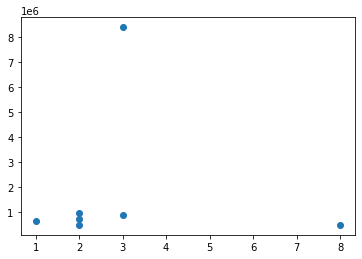

In [100]:
import matplotlib.pyplot as plt

plt.scatter(airport_df['Airports'], airport_df['Population'])

We can see that Kansas City is the smallest city in our dataset, and New York City is the largest.

If you were thinking, *Why does Kansas City have so many airports?*, good for you!

This is one of the benefits we can get from viewing our data in different sorting orders. We can see that the smallest city by population has the largest number of airports. This doesn't seem right.

If we were going to be using this dataset for an actual data science project, we would want to investigate this further. We could:

 * Verify that Kansas City actually does have 8 airports
 * Verify that a few of the other cities, especially the larger ones, have so few airports
 * Look into how the data was collected to see if the count for Kansas City was collected differently:
   * Does it contain regional airports while others do not?
   * What counts as an airport for the city? Farm landing strips? Military bases?
   * How close to a city does an airport need to be to be considered an airport for that city?

You can probably think of many more questions to ask about the data and how it was collected.

When you see something that looks odd in your data, ask questions!

For now, let's get back to sorting. What if we wanted to sort by more than one column?

For instance, we can sort by the number of airports in a city and then by population:

In [98]:
airport_df.sort_values(['Airports', 'Population'])

,City Name,Population,Airports
4,Portland,653115,1
0,Atlanta,498044,2
6,Seattle,744955,2
1,Austin,964254,2
5,San Francisco,883305,3
3,New York City,8398748,3
2,Kansas City,491918,8


Using this we can now answer questions such as *What is the smallest city with two airports?*


Notice that although we sorted the `DataFrame`, we didn't actually change the `DataFrame` itself:

In [99]:
airport_df

,City Name,Population,Airports
0,Atlanta,498044,2
1,Austin,964254,2
2,Kansas City,491918,8
3,New York City,8398748,3
4,Portland,653115,1
5,San Francisco,883305,3
6,Seattle,744955,2


If we do want to save the sort order we can assign the return value of `sort_values()` to another variable:

In [101]:
sorted_airport_df = airport_df.sort_values(['Airports', 'Population'])

sorted_airport_df

,City Name,Population,Airports
4,Portland,653115,1
0,Atlanta,498044,2
6,Seattle,744955,2
1,Austin,964254,2
5,San Francisco,883305,3
3,New York City,8398748,3
2,Kansas City,491918,8


But this doesn't modify the original `DataFrame`. To do that, use the `inplace` argument:

In [102]:
airport_df.sort_values(['Airports', 'Population'], inplace=True)

airport_df

,City Name,Population,Airports
4,Portland,653115,1
0,Atlanta,498044,2
6,Seattle,744955,2
1,Austin,964254,2
5,San Francisco,883305,3
3,New York City,8398748,3
2,Kansas City,491918,8


## References and Copies

Both [Python](https://python.org) and [Pandas](https://pandas.pydata.org) strive to hide lower-level programming details from you whenever they can. However, there are some cases where you do have to be aware of how your data is being managed.

One place where this often happens is when Pandas is working indirectly with with a `DataFrame`.

We'll walk through some examples using the airport data we have seen many times in this lab.

In [103]:
import pandas as pd

airport_df = pd.DataFrame.from_records((
  ('Atlanta', 498044, 2),
  ('Austin', 964254, 2),
  ('Kansas City',  491918, 8),
  ('New York City', 8398748, 3),
  ('Portland', 653115, 1),
  ('San Francisco', 883305, 3),
  ('Seattle', 744955, 2),
), columns=("City Name", "Population", "Airports"))

airport_df

,City Name,Population,Airports
0,Atlanta,498044,2
1,Austin,964254,2
2,Kansas City,491918,8
3,New York City,8398748,3
4,Portland,653115,1
5,San Francisco,883305,3
6,Seattle,744955,2


We'll start simple and assign the `airport_df` to another variable, `airport_df2`. We then try to double the number of airports in `airport_df2`.

What happens to `airport_df` and `airport_df2`?

In [104]:
airport_df2 = airport_df

airport_df2.loc[:, 'Airports'] *= 2

airport_df

,City Name,Population,Airports
0,Atlanta,498044,4
1,Austin,964254,4
2,Kansas City,491918,16
3,New York City,8398748,6
4,Portland,653115,2
5,San Francisco,883305,6
6,Seattle,744955,4


In [105]:
airport_df2 = airport_df.copy()
airport_df2

,City Name,Population,Airports
0,Atlanta,498044,4
1,Austin,964254,4
2,Kansas City,491918,16
3,New York City,8398748,6
4,Portland,653115,2
5,San Francisco,883305,6
6,Seattle,744955,4


Yikes! When we modified `airport_df2` we also modified `airport_df`.

This actually has nothing to do with Pandas, but instead is a case where Python creates a **reference** to our original `DataFrame` instead of a copy.

When we assign `airport_df` to `airport_df2` Python just makes `airport_df2` refer to the object that is in `airport_df`. Both refer to the same copy of the data.

This is desirable in many cases. Your data might be big. Having many copies can consume a lot of memory and take a lot of time.

But sometimes you need to actually copy data. Let's reset our airport `DataFrame` and do just that.

In [106]:
import pandas as pd

airport_df = pd.DataFrame.from_records((
  ('Atlanta', 498044, 2),
  ('Austin', 964254, 2),
  ('Kansas City',  491918, 8),
  ('New York City', 8398748, 3),
  ('Portland', 653115, 1),
  ('San Francisco', 883305, 3),
  ('Seattle', 744955, 2),
), columns=("City Name", "Population", "Airports"))

airport_df

,City Name,Population,Airports
0,Atlanta,498044,2
1,Austin,964254,2
2,Kansas City,491918,8
3,New York City,8398748,3
4,Portland,653115,1
5,San Francisco,883305,3
6,Seattle,744955,2


To make a copy of a `DataFrame` use the `copy()` method.

In [107]:
airport_df2 = airport_df.copy()

airport_df2.loc[:, 'Airports'] *= 2

airport_df

,City Name,Population,Airports
0,Atlanta,498044,2
1,Austin,964254,2
2,Kansas City,491918,8
3,New York City,8398748,3
4,Portland,653115,1
5,San Francisco,883305,3
6,Seattle,744955,2


As you can see, `airport_df` did not change.

But you can see below that `airport_df2` did:

In [108]:
airport_df2

,City Name,Population,Airports
0,Atlanta,498044,4
1,Austin,964254,4
2,Kansas City,491918,16
3,New York City,8398748,6
4,Portland,653115,2
5,San Francisco,883305,6
6,Seattle,744955,4


Pandas adds an additional level of abstraction called **views**. Views are a way to look at the same data from a different perspective.

Let's work through an example using our airport dataset.

Say we wanted to filter to only rows with more than two airports:

In [109]:
many_airports_df = airport_df[airport_df['Airports'] > 2]

many_airports_df

,City Name,Population,Airports
2,Kansas City,491918,8
3,New York City,8398748,3
5,San Francisco,883305,3


What is `many_airports_df`? Is it a new `DataFrame`? Does it only contain three rows of data? Are the rows separate or the same as the rows in `airport_df`? If we modify `many_airports_df` will `airports_df` be modified?

Let's try and see:

In [110]:
many_airports_df = airport_df[airport_df['Airports'] > 2]

many_airports_df['City Name'] = \
  many_airports_df['City Name'].apply(lambda s: s.upper())

airport_df

C:\Users\timit\AppData\Local\Temp\ipykernel_20672\3973342639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  many_airports_df['City Name'] = \


,City Name,Population,Airports
0,Atlanta,498044,2
1,Austin,964254,2
2,Kansas City,491918,8
3,New York City,8398748,3
4,Portland,653115,1
5,San Francisco,883305,3
6,Seattle,744955,2


We didn't modify `airport_df`, so we must be working with a copy.

We did get a warning though:

> ```
SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead
```

In this case Pandas created a copy of the data, but it was uncertain if we wanted to modify the copy or the original `DataFrame`.

Warnings are typically a bad sign. We can get rid of the warning by being explicit about what we want to do.

If we want to copy the data into a new `DataFrame`, we can use `.copy()`:

In [111]:
many_airports_df = airport_df[airport_df['Airports'] > 2].copy()

many_airports_df['City Name'] = \
  many_airports_df['City Name'].apply(lambda s: s.upper())

airport_df

,City Name,Population,Airports
0,Atlanta,498044,2
1,Austin,964254,2
2,Kansas City,491918,8
3,New York City,8398748,3
4,Portland,653115,1
5,San Francisco,883305,3
6,Seattle,744955,2


And if we want to not copy the data and to modify the original we need to index into `airport_df` for the modification:

In [112]:
has_many_airports = airport_df['Airports'] > 2

airport_df.loc[has_many_airports, 'City Name'] = \
  airport_df.loc[has_many_airports, 'City Name'].apply(lambda s: s.upper())

airport_df

,City Name,Population,Airports
0,Atlanta,498044,2
1,Austin,964254,2
2,KANSAS CITY,491918,8
3,NEW YORK CITY,8398748,3
4,Portland,653115,1
5,SAN FRANCISCO,883305,3
6,Seattle,744955,2


### Exercise 6: Updating Calories

We just learned that the calorie count for our candy shop's jelly beans and lollipops is 10% too low. We need to update the calorie count for these two treats.

Below you'll find the `nutrition_information_df` which contains nutritional information about our treats. Write some code to increase the calories for 'Jelly Bean' and 'Lollipop' by 10%. Be sure that the data stored in `nutrition_information_df` is updated.

Be sure that no warnings are issued!

**Student Solution**

In [120]:
import pandas as pd
import numpy as np

nutrition_information_df = pd.DataFrame.from_records((
      ('Cupcake', 178, 5.26, 32.54, 1.37),
      ('Donut', 190, 10.51, 21.62, 2.62),
      ('Eclair', 267, 16.01, 24.68, 6.53),
      ('Froyo', 214, 2.94, 39.24, 9.4),
      ('Gingerbread', 130, 5, 19, 2),
      ('Honeycomb', 190, 13, 23, 2),
      ('Ice Cream Sandwich', 143, 5.6, 21.75, 2.61),
      ('Jelly Bean', 100, 0, 25, 0),
      ('KitKat', 210, 11, 27, 3),
      ('Lollipop', 110, 0, 28, 0),
      ('Marshmallow', 100, 0, 24, 1),
      ('Nougat', 56, 0.23, 12.93, 0.47),
      ('Oreo', 160, 7, 25, 1),
      ('Pie', 356, 16.5, 51, 2.85),
), columns=('Name', 'Calories', 'Fat (g)', 'Carbs (g)', 'Protein (g)'))

# Update 'Lollipop' and 'Jelly Bean' calories by 10%

# 1
# nutrition_information_df.loc[(nutrition_information_df['Name'] == 'Jelly Bean') |
#                               (nutrition_information_df['Name'] == 'Lolipop'), 'Calories'] *= 1.1

# nutrition_information_df

# 2 
nutrition_information_df['Calories'] = np.where((nutrition_information_df['Name'] == 'Jelly Bean') | (nutrition_information_df['Name'] == 'Lolipop'),
                                                nutrition_information_df['Calories'] * 1.1,
                                                nutrition_information_df['Calories'])

nutrition_information_df

,Name,Calories,Fat (g),Carbs (g),Protein (g)
0,Cupcake,178.0,5.26,32.54,1.37
1,Donut,190.0,10.51,21.62,2.62
2,Eclair,267.0,16.01,24.68,6.53
3,Froyo,214.0,2.94,39.24,9.40
4,Gingerbread,130.0,5.00,19.00,2.00
5,Honeycomb,190.0,13.00,23.00,2.00
6,Ice Cream Sandwich,143.0,5.60,21.75,2.61
7,Jelly Bean,110.0,0.00,25.00,0.00
8,KitKat,210.0,11.00,27.00,3.00
9,Lollipop,110.0,0.00,28.00,0.00


---

## Additional Exercises

### Exercise 7: Retail Data

You have been hired to organize a small-town retail chain's data and report to them which of their stores have the most effective marketing, measured by how many dollars of merchandise are sold per visitor.

To accomplish this you are given access to two tables of data.

The first table keeps track of the average daily traffic to each store. We store it in `traffic_df`:

In [121]:
import pandas as pd

traffic_df = pd.DataFrame.from_records((
      ('43 Crescent Way', 2036),
      ('1001 Main St.', 1399),
      ('235 Pear Lane', 1386),
      ('199 Forest Way', 1295),
      ('703 Grove St.', 1154),
      ('55 Orchard Blvd.', 1022),
      ('202 Pine Drive', 968),
      ('98 Mountain Circle', 730),
      ('2136 A St.', 729),
      ('3430 17th St.', 504),
      ('7766 Ocean Ave.', 452),
      ('1797 Albatross Ct.', 316),
), columns=('Location', 'Traffic'))

traffic_df

,Location,Traffic
0,43 Crescent Way,2036
1,1001 Main St.,1399
2,235 Pear Lane,1386
3,199 Forest Way,1295
4,703 Grove St.,1154
5,55 Orchard Blvd.,1022
6,202 Pine Drive,968
7,98 Mountain Circle,730
8,2136 A St.,729
9,3430 17th St.,504


The second table contains the average revenue from each store. We store in it `locations_df`:

In [122]:
locations_df = pd.DataFrame.from_records((
  ('43 Crescent Way', 6832),
  ('55 Orchard Blvd.', 13985),
  ('98 Mountain Circle', 3956),
  ('199 Forest Way', 572),
  ('202 Pine Drive', 3963),
  ('235 Pear Lane', 25653),
  ('703 Grove St.', 496),
  ('1001 Main St.', 38532),
  ('1797 Albatross Ct.', 26445),
  ('2136 A St.', 34560),
  ('3430 17th St.', 1826),
  ('7766 Ocean Ave.', 5124),
), columns=('Location', 'Revenue'))
  
locations_df

,Location,Revenue
0,43 Crescent Way,6832
1,55 Orchard Blvd.,13985
2,98 Mountain Circle,3956
3,199 Forest Way,572
4,202 Pine Drive,3963
5,235 Pear Lane,25653
6,703 Grove St.,496
7,1001 Main St.,38532
8,1797 Albatross Ct.,26445
9,2136 A St.,34560


Given the two `DataFrame` objects mentioned above, perform the following tasks:

1. Merge the two dataframes to create a single dataframe with store names: average daily traffic and average daily revenue. Call this new `DataFrame` `performance_df`.

2. Make a new column in `performance_df`, showing the average daily revenue *per customer*. Call the new column 'Revenue per Customer'. Revenue per customer is defined as `rpc = revenue / traffic`.

3. Print the 'Location' of the store that has the highest 'Revenue per Customer'.

In [125]:
# Part 1: Perform merge
performance_df = pd.merge(traffic_df, locations_df, on='Location', how='inner')

# Part 2: Create column
performance_df['Revenue per Customer'] = performance_df['Revenue'] / performance_df['Traffic']

performance_df

,Location,Traffic,Revenue,Revenue per Customer
0,43 Crescent Way,2036,6832,3.355599
1,1001 Main St.,1399,38532,27.542530
2,235 Pear Lane,1386,25653,18.508658
3,199 Forest Way,1295,572,0.441699
4,703 Grove St.,1154,496,0.429809
5,55 Orchard Blvd.,1022,13985,13.683953
6,202 Pine Drive,968,3963,4.094008
7,98 Mountain Circle,730,3956,5.419178
8,2136 A St.,729,34560,47.407407
9,3430 17th St.,504,1826,3.623016


In [126]:
# Part 3: Print location of store with the most revenue per customer
performance_df.sort_values(by='Revenue per Customer', ascending=False).head(1)['Location']

11    1797 Albatross Ct.
Name: Location, dtype: object

In [127]:
performance_df[performance_df['Revenue per Customer'] == performance_df['Revenue per Customer'].max()]['Location']

11    1797 Albatross Ct.
Name: Location, dtype: object

---